<h3 align='center'><b>Project - IPL DATA Analysis 2023</b></h3>

### It is a detailed analysis of the dataset of IPL 2023 and some past data, which is extracted using selenium and beautifulsoup (web scraping) from (www.iplt20.com/stats/)

The Indian Premier League (IPL) is a popular Twenty20 cricket tournament held annually in India. The project aimed to perform data analysis on IPL statistics using web scraping techniques with Selenium and Python.

The code utilized Selenium's WebDriver to automate the Firefox browser and extract data from the IPL statistics page (https://www.iplt20.com/stats/). It navigated to the webpage, waited for the table to load, located the table element using XPath, and retrieved all the rows within the table.

To store the extracted data, a CSV file named "leadersdata.csv" was created. Each row of the table was processed iteratively, extracting the text content from each cell using the "td" tags. The extracted data from each row was written to the CSV file.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### => Observation:

1. The project utilizes the Selenium library for web scraping. The code extracts data from the website "https://www.iplt20.com/stats/" using the Firefox browser.

2. The code imports the necessary libraries and sets up the Firefox driver using the GeckoDriverManager.

3. After navigating to the desired webpage, the code introduces a delay of 2 seconds to allow the table to load completely. You can adjust this sleep time according to the webpage's loading speed.

4. The code then locates the table element on the webpage using an XPath expression.

5. It retrieves all the rows within the table by finding the "tr" tags.

In [16]:
# Load the data into a DataFrame
data = pd.read_csv('leadersdata.csv', nrows = 21)

In [17]:
data.info() ## gives info on data

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 21 entries, 0 to 20

Data columns (total 12 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Player  21 non-null     object 

 1   I       21 non-null     int64  

 2   R       21 non-null     int64  

 3   B       21 non-null     int64  

 4   Outs    21 non-null     int64  

 5   Avg     21 non-null     float64

 6   SR      21 non-null     float64

 7   HS      21 non-null     int64  

 8   4s      21 non-null     int64  

 9   6s      21 non-null     int64  

 10  50      21 non-null     int64  

 11  100     21 non-null     int64  

dtypes: float64(2), int64(9), object(1)

memory usage: 2.1+ KB


#### => Observation:

The observation is based on the output of the `data.info()` method applied to the IPL data, which is stored as a Pandas DataFrame.

1. The DataFrame contains 21 entries or rows, ranging from index 0 to index 20.

2. The DataFrame has a total of 12 columns, each representing a specific attribute of the IPL data.

3. The "Player" column represents the names of the players, and it contains non-null values for all 21 entries.

4. All the numerical columns (except for "Avg" and "SR") have non-null values for all 21 entries, indicating that there are no missing values in those columns.

5. The "Avg" and "SR" columns, which represent the batting average and strike rate respectively, are stored as floating-point numbers (float64) and have non-null values for all 21 entries.

6. The memory usage of the DataFrame is reported as approximately 2.1 KB.

In [18]:
data.describe() # provide statistical info on the data

,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,10.952381,286.190476,194.238095,8.476190,29.637619,143.070476,59.238095,25.095238,13.333333,1.619048,0.190476
std,4.432563,226.339926,151.753058,4.675672,14.559745,30.913937,35.253234,24.297952,9.911273,1.745743,0.679636
min,2.000000,2.000000,4.000000,0.000000,0.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,124.000000,62.000000,4.000000,23.190000,136.760000,27.000000,8.000000,7.000000,0.000000,0.000000
50%,12.000000,301.000000,188.000000,8.000000,26.000000,142.860000,57.000000,12.000000,12.000000,1.000000,0.000000
75%,14.000000,371.000000,261.000000,13.000000,38.000000,156.060000,92.000000,38.000000,18.000000,3.000000,0.000000
max,17.000000,890.000000,564.000000,16.000000,59.330000,216.670000,129.000000,85.000000,35.000000,6.000000,3.000000


#### => Observations:

1. The players in the dataset have played an average of approximately 10.95 matches, with a minimum of 2 matches and a maximum of 17 matches.

2. The average runs scored by players is around 286.19, with a minimum of 2 runs and a maximum of 890 runs.

3. The average number of balls faced (B) is approximately 194.24, with a minimum of 4 balls and a maximum of 564 balls.

4. On average, players have been dismissed (Outs) 8.48 times, with a minimum of 0 dismissals and a maximum of 16 dismissals.

5. The average batting average (Avg) is approximately 29.64, with a minimum of 0.00 and a maximum of 59.33.

6. The average strike rate (SR) is around 143.07, indicating the average number of runs scored per 100 balls faced.

In [19]:
#dataframe head
data.head()

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100
0,DP Conway,15,672,481,13,51.69,139.71,92,77,18,6,0
1,RD Gaikwad,15,590,400,14,42.14,147.50,92,46,30,4,0
2,MM Ali,10,124,91,7,17.71,136.26,23,12,6,0,0
3,BA Stokes,2,15,14,2,7.50,107.14,8,2,0,0,0
4,AT Rayudu,12,158,113,10,15.80,139.82,27,10,9,0,0


#### Observations:

1. **DP Conway**: DP Conway has played 15 matches and scored 672 runs at an impressive average of 51.69. He has faced 481 balls and has a strike rate of 139.71. His highest score (HS) is 92, and he has hit 77 fours and 18 sixes. He has also scored 6 half-centuries (50) but hasn't scored any centuries (100) yet.

2. **RD Gaikwad**: RD Gaikwad has played 15 matches and scored 590 runs. He has an average of 42.14 and a strike rate of 147.50. His highest score is 92, and he has hit 46 fours and 30 sixes. Similar to DP Conway, Gaikwad has also scored 4 half-centuries but hasn't reached a century.

3. **MM Ali**: MM Ali has played 10 matches and scored 124 runs. He has an average of 17.71 and a strike rate of 136.26. His highest score is 23, and he has hit 12 fours and 6 sixes. Ali has not scored a half-century or a century yet.

4. **BA Stokes**: BA Stokes has played 2 matches and scored 15 runs. He has an average of 7.50 and a strike rate of 107.14. His highest score is 8, and he has hit 2 fours and 0 sixes. Stokes has not scored a half-century or a century in the matches played so far.

5. **AT Rayudu**: AT Rayudu has played 12 matches and scored 158 runs. He has an average of 15.80 and a strike rate of 139.82. His highest score is 27, and he has hit 10 fours and 9 sixes. Rayudu has not scored a half-century or a century in the matches considered.


In [20]:
#dataframe tail
data.tail()

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100
16,Prabhsimran Singh,14,358,238,14,25.57,150.42,103,38,19,1,1
17,S Dhawan,11,373,261,9,41.44,142.91,99,49,12,3,0
18,PBB Rajapaksa,4,71,62,3,23.67,114.52,50,6,2,1,0
19,JM Sharma,14,309,198,13,23.77,156.06,49,22,21,0,0
20,Sikandar Raza,7,139,98,5,27.80,141.84,57,10,6,1,0


#### Observations:

1. **Prabhsimran Singh**: Played 14 matches, scored 358 runs with an average of 25.57 and a strike rate of 150.42. Hit 1 century and 1 half-century.

2. **S Dhawan**: Played 11 matches, scored 373 runs with an average of 41.44 and a strike rate of 142.91. Hit 3 half-centuries.

3. **PBB Rajapaksa**: Played 4 matches, scored 71 runs with an average of 23.67 and a strike rate of 114.52. Hit 1 half-century.

4. **JM Sharma**: Played 14 matches, scored 309 runs with an average of 23.77 and a strike rate of 156.06.

5. **Sikandar Raza**: Played 7 matches, scored 139 runs with an average of 27.80 and a strike rate of 141.84. Hit 1 half-century.

In [21]:
data.shape #displays rows x columns

(21, 12)

In [22]:
data.columns #displays all the columns

Index(['Player', 'I', 'R', 'B', 'Outs', 'Avg', 'SR', 'HS', '4s', '6s', '50',
       '100'],
      dtype='object')

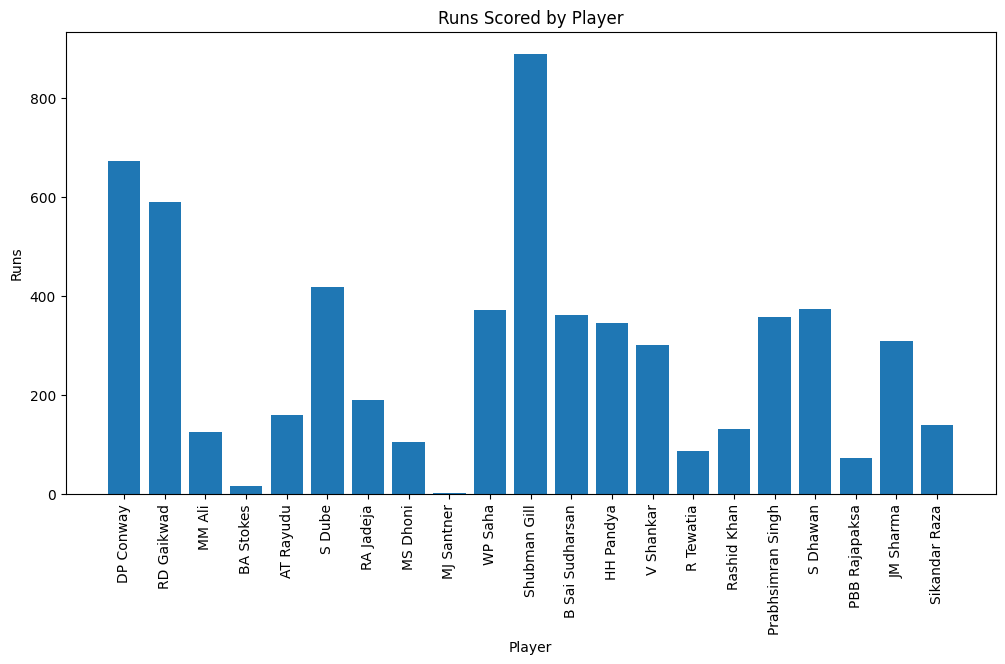

In [23]:
# Plot 1: Bar plot of Runs (R) by Player
plt.figure(figsize=(12, 6))
plt.bar(data['Player'], data['R'])
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Runs Scored by Player')
plt.xticks(rotation=90)
plt.show()

#### Observations:
1. This graph describes the most runs scored by different batsmans.
2. Shubhman Gill played exceptionally well by scoring more than 800.
3. From CSK Devon joined in the race but was quite away.
4. Ruturaj doesn't seem to be in a goodform
5. performance were constant with a bit of ups and downs.

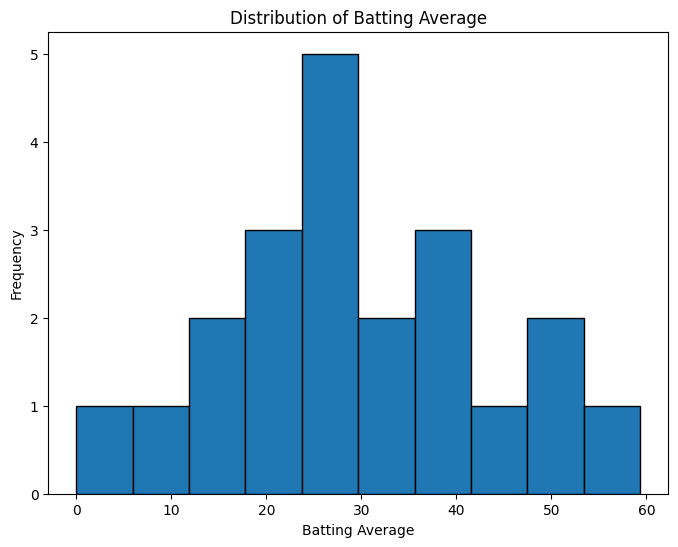

In [24]:
# Plot 2: Histogram of Batting Average (Avg)
plt.figure(figsize=(8, 6))
plt.hist(data['Avg'], bins=10, edgecolor='black')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.title('Distribution of Batting Average')
plt.show()

#### Observations:

- The figure size is set to (8, 6) using `plt.figure(figsize=(8, 6))`, which determines the dimensions of the plot.
- It is clear that bastman having an average or medium batting average are highly to provide great performance in mostly matches.
- Players with highest bztting average doesn't perform well in every match

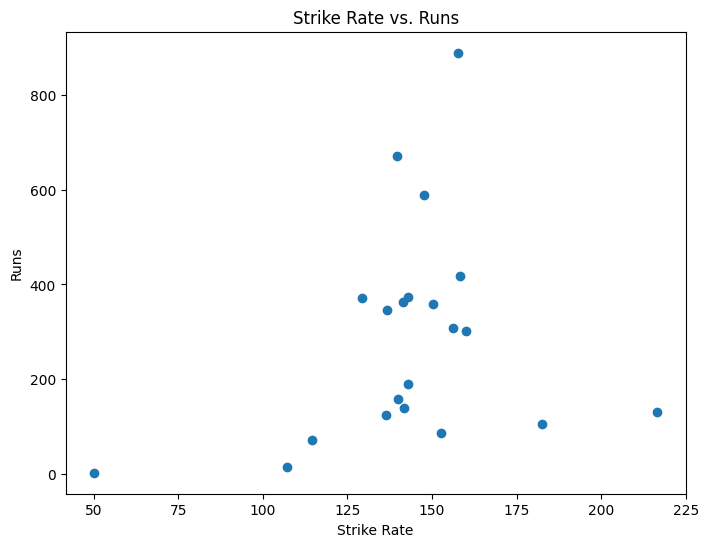

In [25]:
# Plot 3: Scatter plot of Strike Rate (SR) vs. Runs (R)
plt.figure(figsize=(8, 6))
plt.scatter(data['SR'], data['R'])
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.title('Strike Rate vs. Runs')
plt.show()

#### Observations:
- It is observed from the above graph that player with strike rate between 125-175 are able to make more runs.
- As compared to players having highest runs.
- The scatter graph shows the concentration of approx 400 runs, which means mostly players made approx 400 runs.

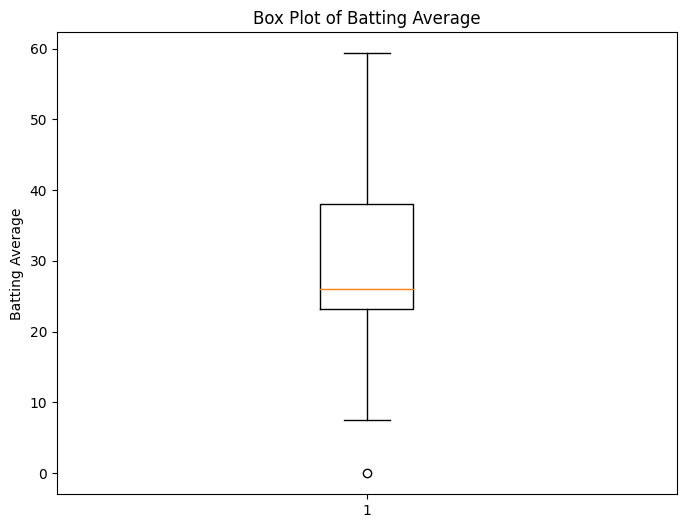

In [26]:
# Plot 4: Box plot of Batting Average (Avg)
plt.figure(figsize=(8, 6))
plt.boxplot(data['Avg'])
plt.ylabel('Batting Average')
plt.title('Box Plot of Batting Average')
plt.show()

#### Observations:

- There are 21 players' batting averages in the dataset.
- The average batting average is around 29.64, with a moderate amount of variability (standard deviation of approximately 14.56).
- The minimum batting average is 0, indicating players who have not scored any runs.
- The maximum batting average is 59.33, representing the highest average achieved by a player.
- The interquartile range (IQR) spans from 23.19 (25th percentile) to 38 (75th percentile), covering the middle 50% of the data.
- The median batting average is 26, providing a measure of the central tendency.
- There are no outliers displayed based on the whiskers of the box plot.

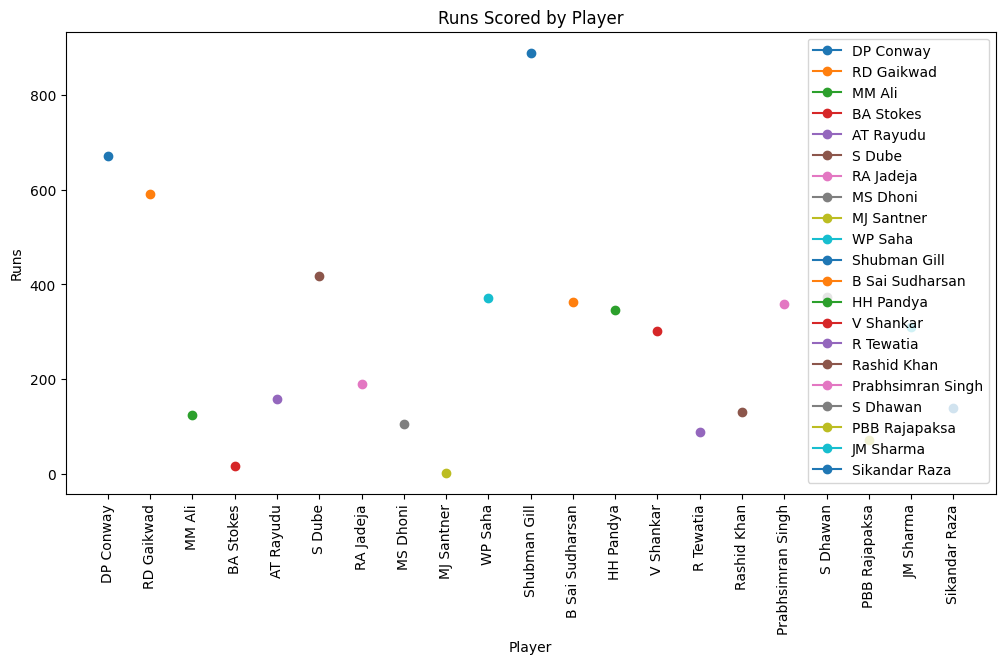

In [27]:
# Plot 5: Line plot of Runs (R) by Player
plt.figure(figsize=(12, 6))
for player in data['Player']:
    player_data = data[data['Player'] == player]
    plt.plot(player_data['Player'], player_data['R'], marker='o', label=player)
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Runs Scored by Player')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Observations:
1. The scatter plot depicts the runs scored by various batsmen.
2. Shubhman Gill stands out with an exceptional performance, scoring over 800 runs.
3. Devon from CSK entered the race but lagged significantly behind.
4. Ruturaj seems to be out of form as indicated by his lower run scores.
5. The performances of the batsmen show relative consistency with some fluctuations.

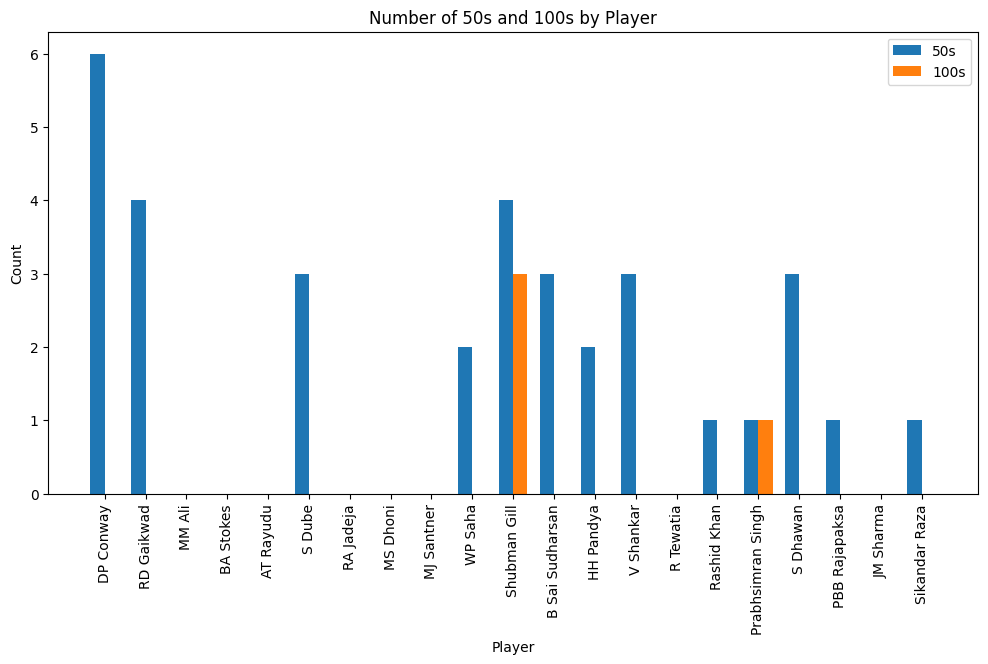

In [28]:
# Plot 6: Bar plot of Number of 50s and 100s by Player
plt.figure(figsize=(12, 6))
width = 0.35
ind = np.arange(len(data))
plt.bar(ind, data['50'], width, label='50s')
plt.bar(ind + width, data['100'], width, label='100s')
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Number of 50s and 100s by Player')
plt.xticks(ind + width / 2, data['Player'], rotation=90)
plt.legend()
plt.show()

#### Observations:
- Devon Conway highest number of 50s but shubhman gill scored 50s as well as 100s.
- Gaikwad with Shubham Dube too were just a little behind conway which marked their victory.
- Prabhsimran scored 1 100s.
- Shubman Gill was able to score 3 100s.

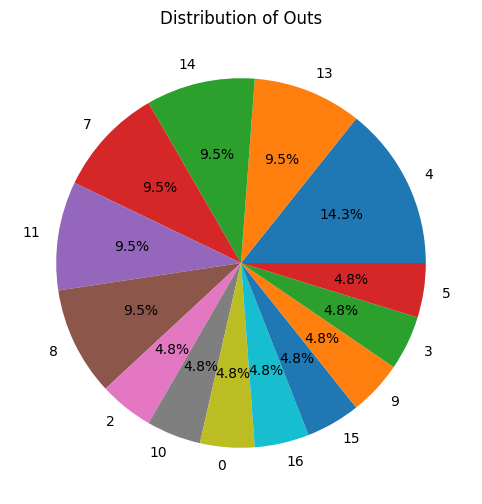

In [29]:
# Plot 7: Pie chart of Number of Outs (Outs)
plt.figure(figsize=(8, 6))
outs_count = data['Outs'].value_counts()
plt.pie(outs_count, labels=outs_count.index, autopct='%1.1f%%')
plt.title('Distribution of Outs')
plt.show()

#### Observations:
- It provide with the number of outs in each match.
- And how much percentage of outs of a match to the outs of the whole series.

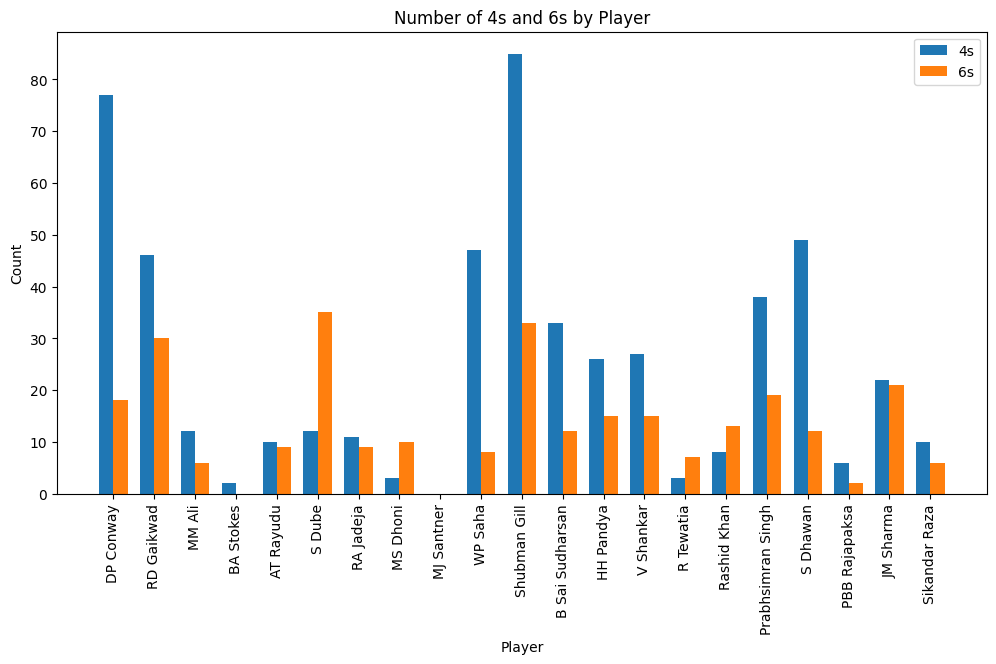

In [30]:
# Plot 8: Bar plot of Number of 4s and 6s by Player
plt.figure(figsize=(12, 6))
width = 0.35
ind = np.arange(len(data))
plt.bar(ind, data['4s'], width, label='4s')
plt.bar(ind + width, data['6s'], width, label='6s')
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Number of 4s and 6s by Player')
plt.xticks(ind + width / 2, data['Player'], rotation=90)
plt.legend()
plt.show()

#### Observations:
- From GT SHubhman Gill and Wridhman Saha scored quite a lot of foues.
- Wheras in CSK Devon and Ruturaj scored fours, Shubham scored more in sixes.

In [ ]:
# Plot 9: Stacked bar plot of 50s and 100s by Player
plt.figure(figsize=(12, 6))
ind = np.arange(len(data))
plt.bar(data['Player'], data['50'], label='50s')
plt.bar(data['Player'], data['100'], bottom=data['50'], label='100s')
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Number of 50s and 100s by Player')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Observations:

1. The stacked bar plot illustrates the number of 50s and 100s scored by each player.
2. The x-axis represents the players' names, while the y-axis represents the count of 50s and 100s.
3. The blue bars represent the count of 50s, and the orange bars represent the count of 100s.
4. Players who have a higher count of 100s compared to 50s will have a longer orange bar, indicating their proficiency in scoring centuries.

In [4]:
# Plot 10: Area plot of Runs (R) by Player
plt.figure(figsize=(12, 6))
for player in data['Player']:
    player_data = data[data['Player'] == player]
    plt.fill_between(player_data.index, player_data['R'], alpha=0.5, label=player)
plt.xlabel('Index')
plt.ylabel('Runs')
plt.title('Runs Scored by Player')
plt.legend()
plt.show()

<class 'NameError'>: name 'plt' is not defined

#### Observations:
- The area plot visualizes the runs scored by different players over time.
- Each player is represented by a filled area plot.
- The x-axis represents the index or time period, while the y-axis represents the runs scored.
- The color-filled areas show the range of runs scored by each player, with the transparency set to 0.5 (alpha=0.5) for better visibility.

## Each Ball Data Analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Read the CSV file into a DataFrame
data = pd.read_csv('each_ball_records.csv')

Text(0.5, 1.0, 'Scatter Plot')

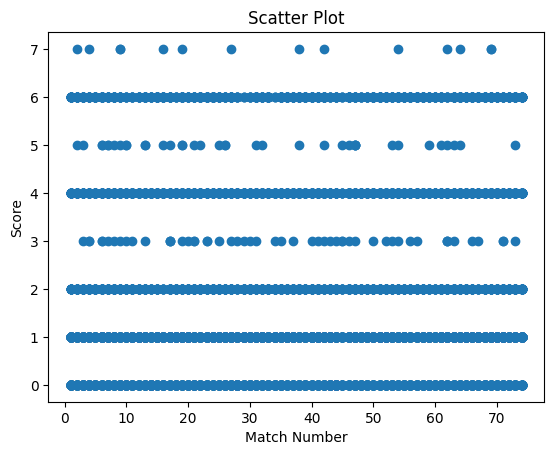

In [35]:
# Create a scatter plot
plt.scatter(data['match_no'], data['score'])
plt.xlabel('Match Number')
plt.ylabel('Score')
plt.title('Scatter Plot')

#### Observations:

- The scatter plot displays the relationship between match number and score for the given dataset.
- Each data point represents a specific match number and its corresponding score.
- The x-axis is labeled as "Match Number," indicating the variable being measured.
- The y-axis is labeled as "Score," representing the values of the scores.
- The title of the plot is "Scatter Plot," summarizing the type of visualization being presented.
- By examining the scatter plot, you can observe any patterns or trends in the data, such as a correlation between match number and scores.

Text(0.5, 1.0, 'Histogram')

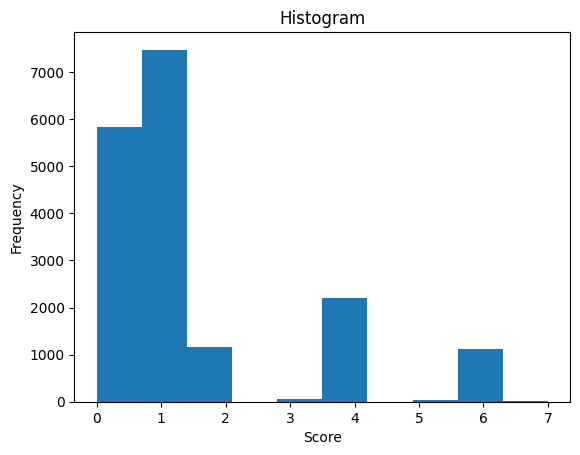

In [37]:
# Create a histogram
plt.figure()
plt.hist(data['score'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram')

#### Observations:
- It represnts that players with a fewer score were frequent.
- Also, that highest scoring players were very few as well as not played highest in every mmatch.

Text(0.5, 1.0, 'Box Plot')

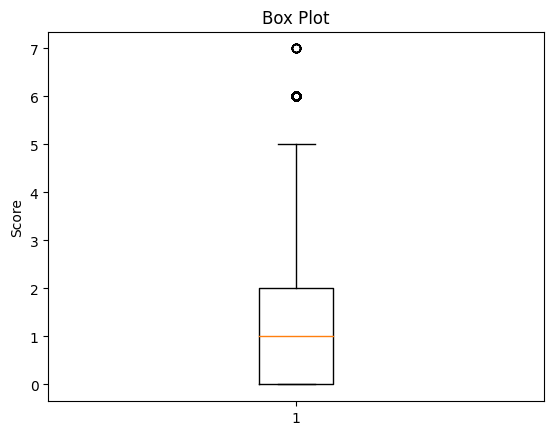

In [39]:
# Create a box plot
plt.figure()
plt.boxplot(data['score'])
plt.ylabel('Score')
plt.title('Box Plot')

#### Observations:
- The box plot provides a visual summary of the distribution of scores in the dataset.
- The y-axis is labeled as "Score," representing the values of the scores being measured.
- The title of the plot is "Box Plot," indicating the type of visualization being presented.
- The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data. It provides information about the dispersion of the scores within this range.

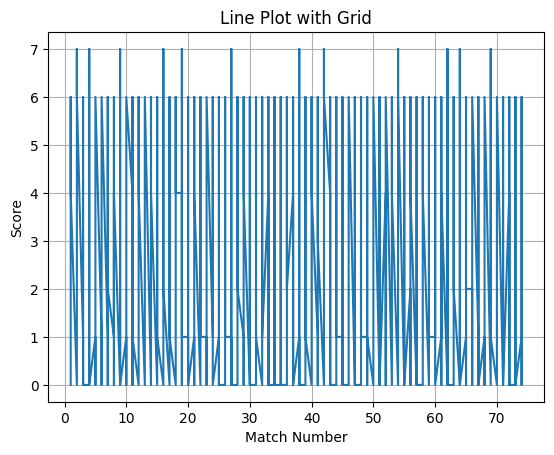

In [42]:
# Add a grid to the plot
plt.figure()
plt.plot(data['match_no'], data['score'])
plt.xlabel('Match Number')
plt.ylabel('Score')
plt.title('Line Plot with Grid')
plt.grid(True)

#### Observations:
- Data seems to be clumsed but in this case we can determining density in a grid.
- It is clear that in every 10 matches atleast  in 3 high score was achieved.

## Each match Data Analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv("each_match_records.csv")

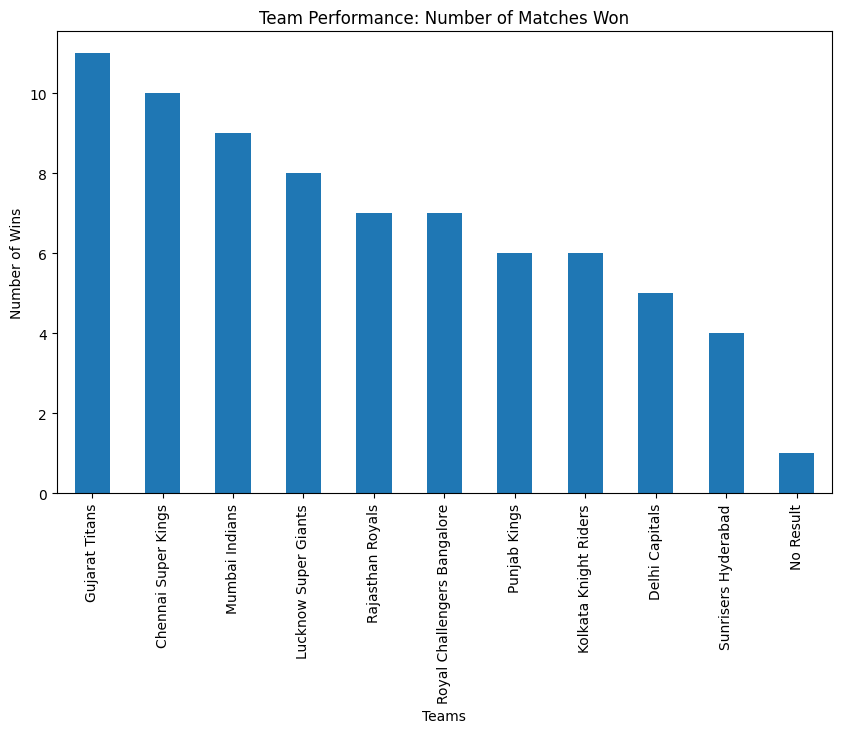

In [48]:
# Team Performance - Bar Graph
team_wins = df['winner'].value_counts()
team_wins.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Team Performance: Number of Matches Won')
plt.show()

#### Observations:
1. Gujrat Titans won the maximum no. of matches and was at the top of the table mostly.
2. Snrisers lagged behind a bit and were not in teh form.
3. Teams like CSM and MI along with RCB where having tough battles between.

C:\Users\Ankit Namdev\AppData\Local\Temp\ipykernel_11656\2949802860.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

  df['date'] = pd.to_datetime(df['date'])


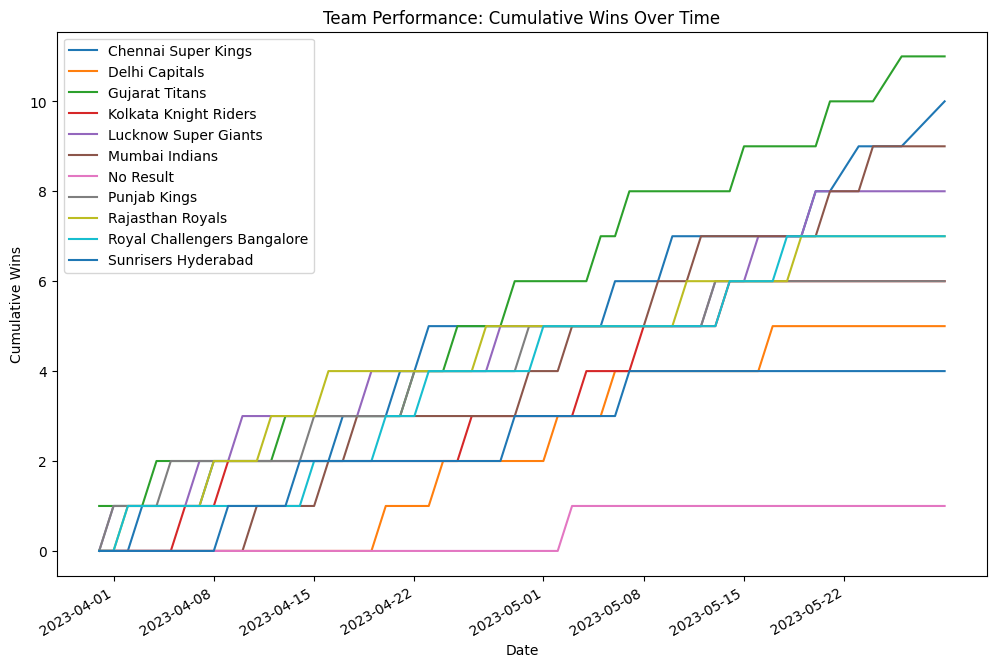

In [49]:
# Team Performance - Line Graph
df['date'] = pd.to_datetime(df['date'])
team_cumulative_wins = df.groupby('date')['winner'].value_counts().unstack().fillna(0).cumsum()
team_cumulative_wins.plot(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Cumulative Wins')
plt.title('Team Performance: Cumulative Wins Over Time')
plt.legend(loc='best')
plt.show()

#### Observations:
1. GT glided over the top after 50% matches
2. Wheras CSK battled, RCB too was in the big run but didnt made it.
3. MI played constant along with KKR and RR.

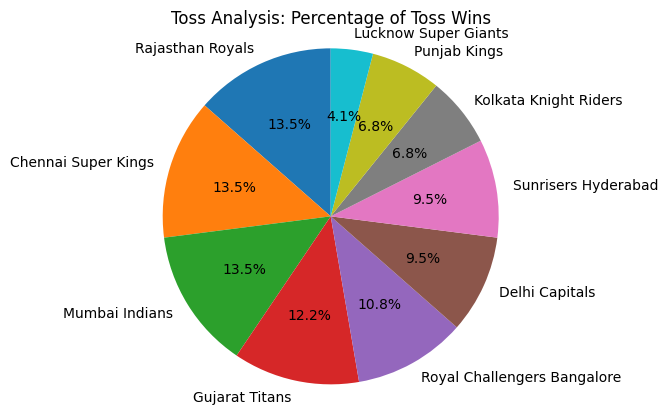

In [50]:
# Toss Analysis - Pie Chart
toss_wins = df['toss_won'].value_counts()
plt.pie(toss_wins, labels=toss_wins.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Analysis: Percentage of Toss Wins')
plt.axis('equal')
plt.show()

#### Observations:
1. Rajasthan Royals won the maximum no. of toss along with  CSK.
2. LSG wont least no. of tossed.
3. RCB, DC Sunrisers were constant were approx 10%.

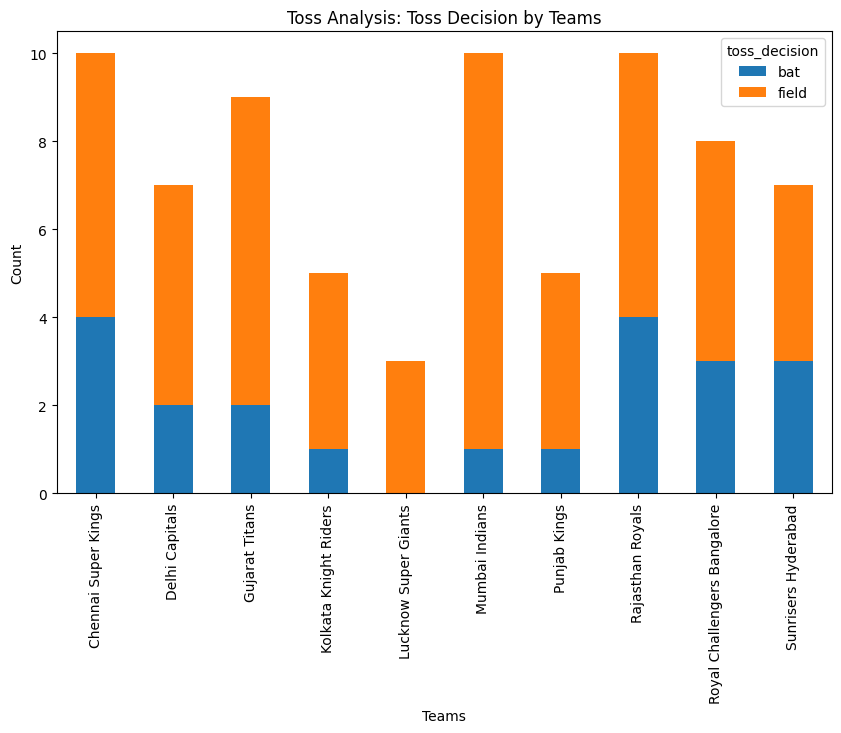

In [51]:
# Toss Analysis - Stacked Bar Graph
toss_decision_counts = df.groupby(['toss_won', 'toss_decision']).size().unstack().fillna(0)
toss_decision_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Toss Analysis: Toss Decision by Teams')
plt.show()

#### Observations:
1. Maximum Teams took fielding after winning toss.
2. LSG choose fielding every team.
3. It concludes that the pitch condition of grounds on average were suitable for bowling
4. Only fewer were best for batting first.

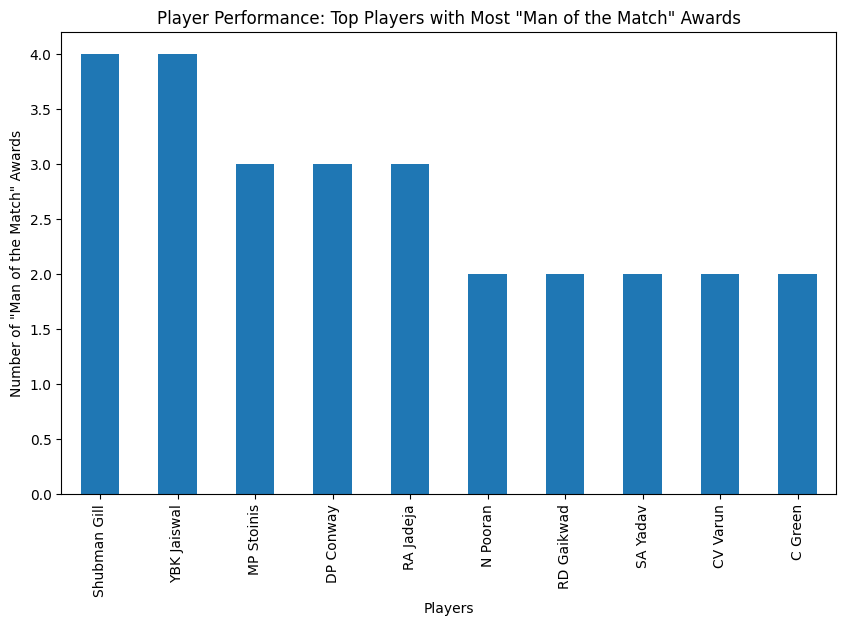

In [52]:
# Player Performance - Bar Graph
man_of_match_counts = df['man_of_match'].value_counts().head(10)
man_of_match_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Players')
plt.ylabel('Number of "Man of the Match" Awards')
plt.title('Player Performance: Top Players with Most "Man of the Match" Awards')
plt.show()

#### Observations:
1. Shubhman Gill and Jaiswal both recieved 4 times man of the match.
2. Stoinis, Conway and Jadega were at 2
3. It concludes that Gill and Jaiswal were very efficent for the victory of team.

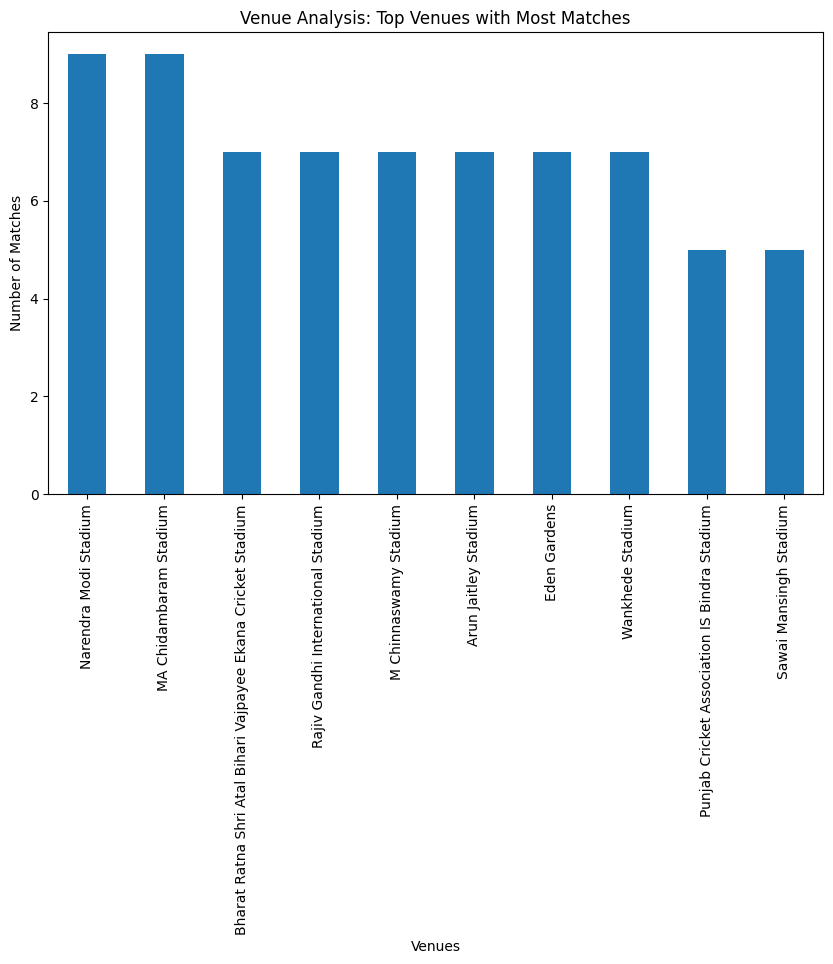

In [53]:
# Venue Analysis - Bar Graph
venue_counts = df['venue'].value_counts().head(10)
venue_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Venues')
plt.ylabel('Number of Matches')
plt.title('Venue Analysis: Top Venues with Most Matches')
plt.show()

#### Onservations:
1. Most of the Matches were conducted at NM Stadium and MAA Chin.. Stadium, mostly due to their size.
2. Other stadium had 4-6 on an average.
3. Sawai Mansingh Stadium had a lowest of 5 matches.
4. Narendra Modi Stadium seems more favourable for matches.

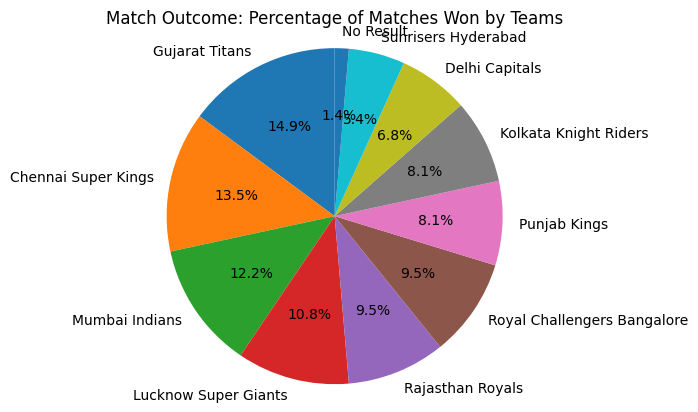

In [54]:
# Match Outcome - Pie Chart
outcome_counts = df['winner'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Match Outcome: Percentage of Matches Won by Teams')
plt.axis('equal')
plt.show()

#### Observations:
- It shows maximum winnings from a team.
- Highest were from GT witha 14.9%.
- Lowest was by Sunrisers Hyderabad by winning only 5.4% matches.
- CSK was on second no. with 13.5%.
- other teams won between 8%-12%